<a id='Data_loading'></a>
## **1. Data Loading** ##

In [4]:
import numpy as np 
import pandas as pd 

heart = pd.read_csv("./Data/processed.cleveland.csv")
heart.info()
heart.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


(303, 14)

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


Column names are unclear. Some of the data types are not correct. For example, sex should be a factor/categorical variable.

<a id='EDA'></a>
## **2. Exploratory Data Analysis** ##

In [2]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
import pandas_profiling as pp

pp.ProfileReport(heart)

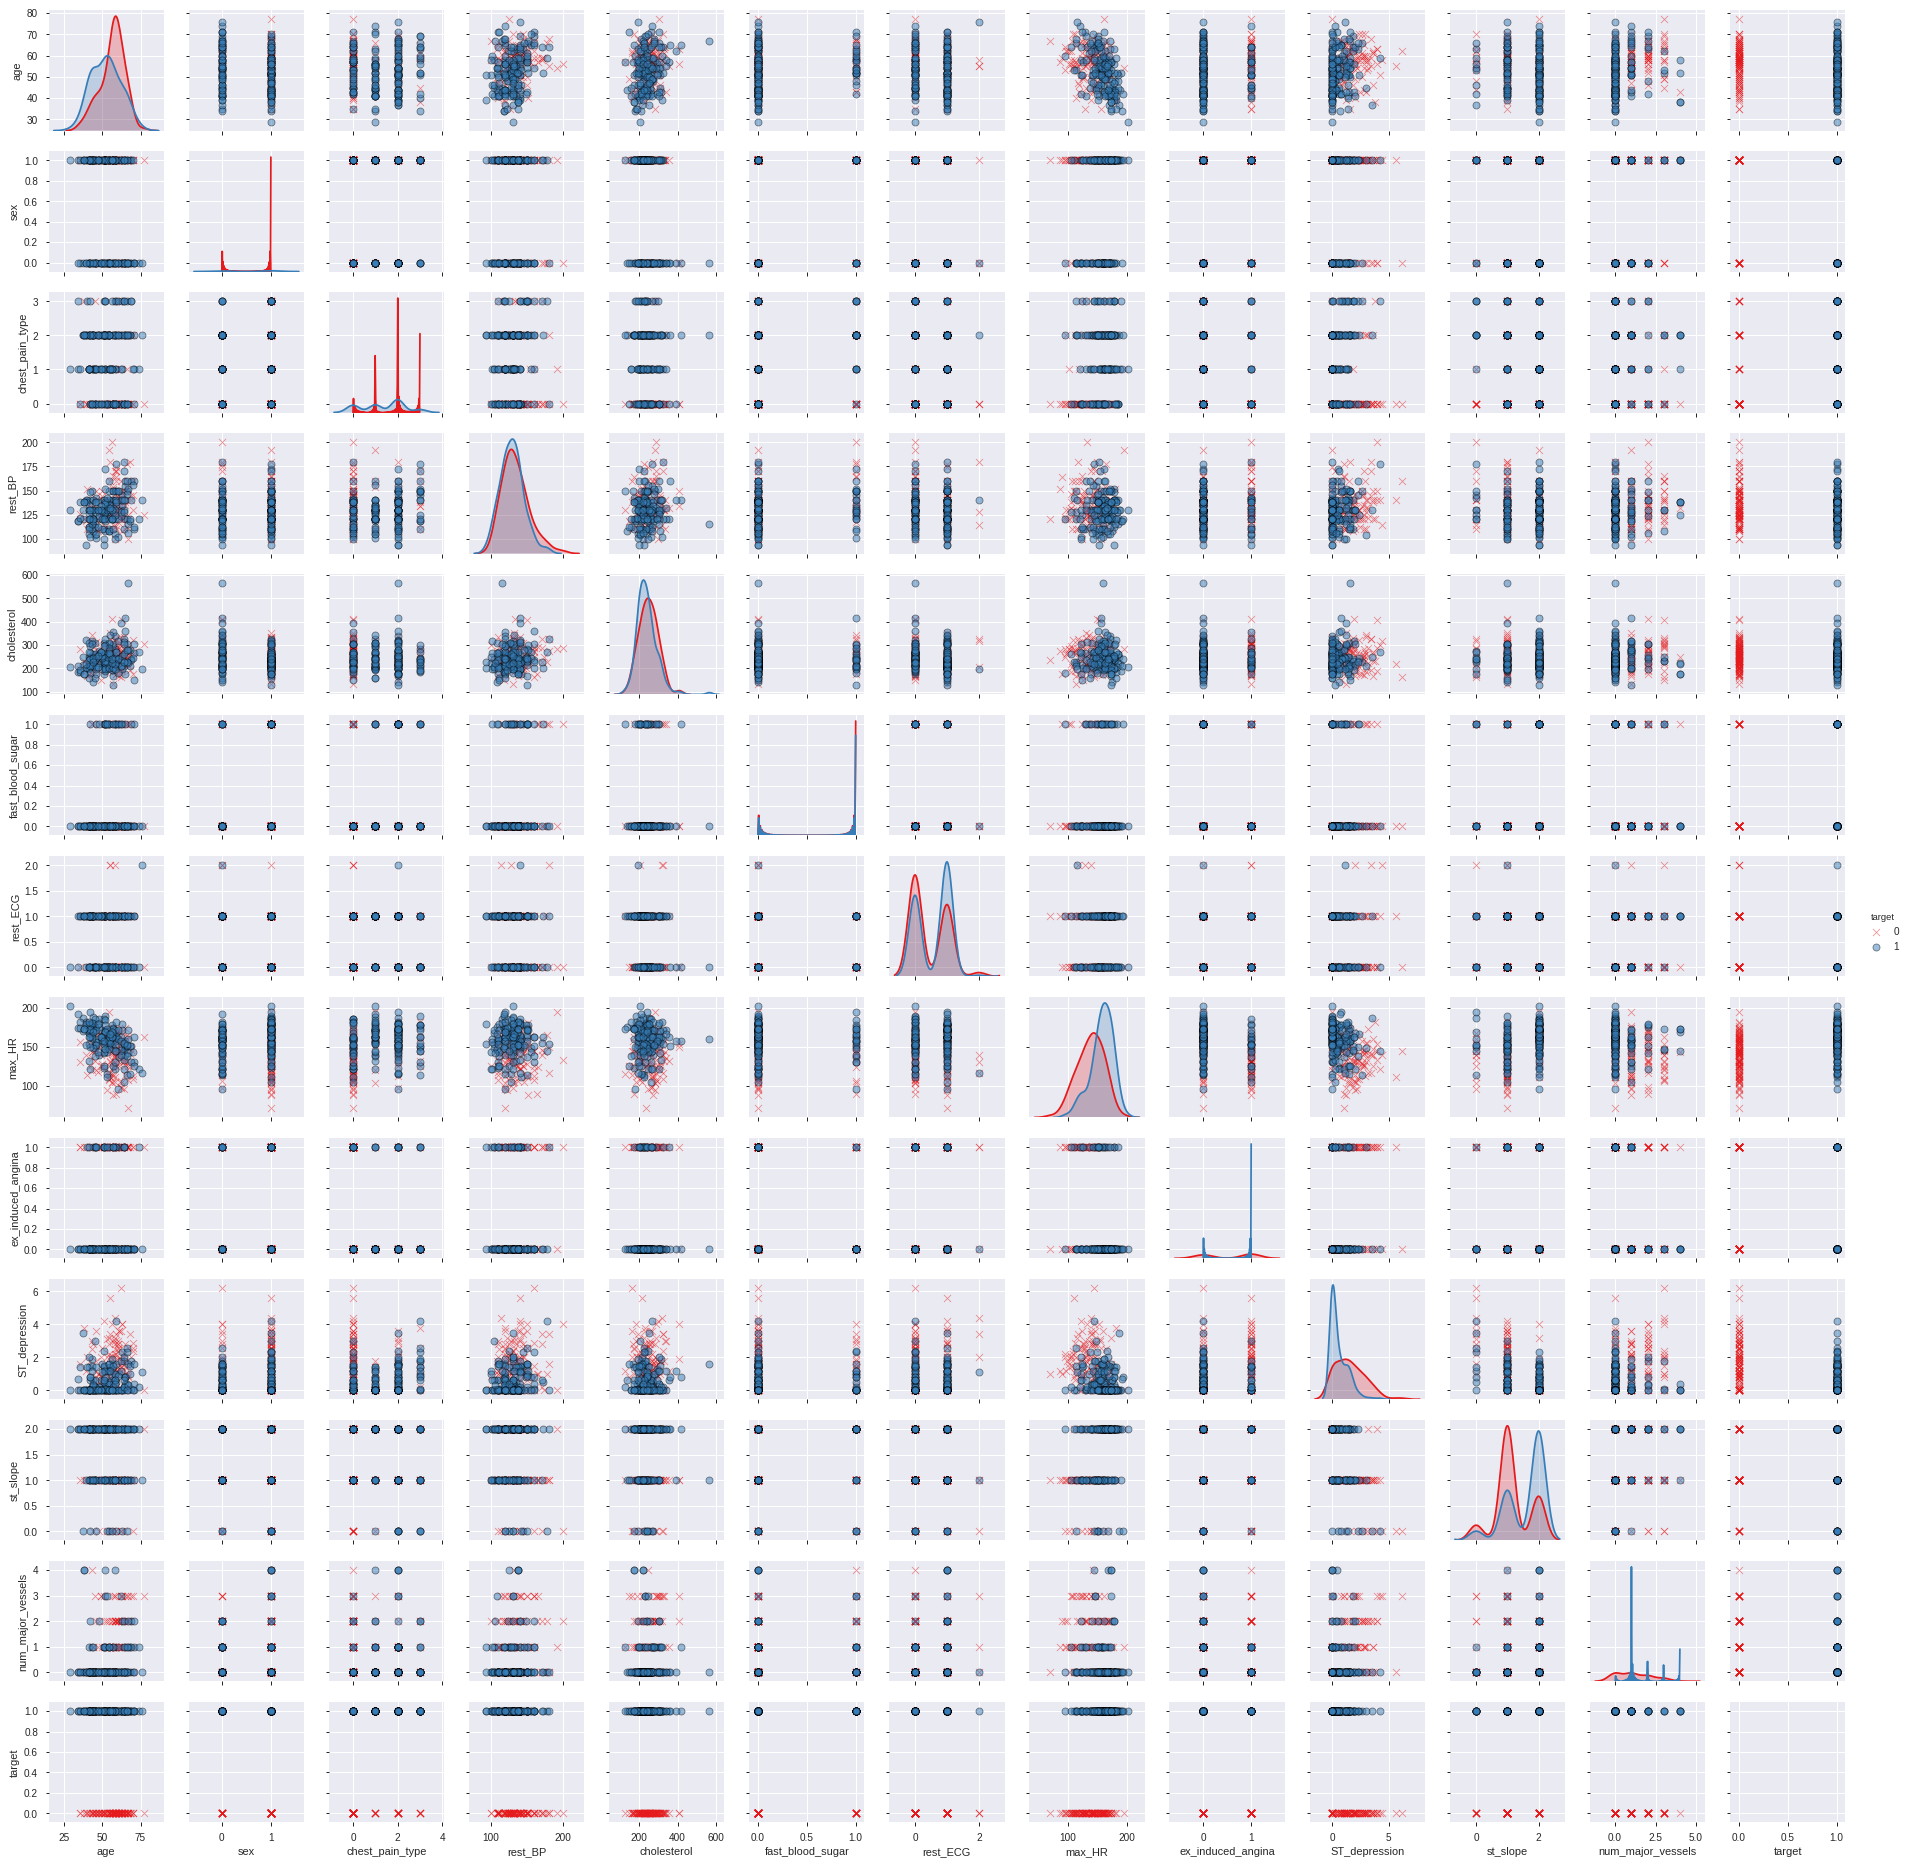

In [4]:
import seaborn as sns
heart.columns = ['age', 'sex', 'chest_pain_type', 'rest_BP', 'cholesterol', 'fast_blood_sugar', 'rest_ECG', 'max_HR', 'ex_induced_angina', 
               'ST_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
sns.pairplot(heart.drop('thalassemia', axis=1), diag_kind='kde', palette='Set1', hue='target', markers=['x','o'], 
            plot_kws = {'alpha': 0.5, 's': 50, 'edgecolor': 'k'},
            height=2)

<a id='Data_cleaning'></a>
## **3. Data Cleaning** ##

ECG ST segment [guide](http://litfl.com/st-segment-ecg-library/).

Thalsssemia will be left out of analyses as it is unclear what the numbers refer to.

Target: 0 = disease, 1 = no disease

0: typical angina
1: atypical angina
2: non-anginal pain
3: asymptomatic

Teget might be swapped

In [5]:
## Data Cleaning

# rename columns
heart.columns = ['age', 'sex', 'chest_pain_type', 'rest_BP', 'cholesterol', 'fast_blood_sugar', 'rest_ECG', 'max_HR', 'ex_induced_angina', 
               'ST_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# convert categorical columns to categories
heart['sex'] = heart['sex'].astype('category').cat.rename_categories(['female','male'])
heart['chest_pain_type'] = heart['chest_pain_type'].astype('category').cat.rename_categories(['asymptomatic', 'typical angina','atypical', 'anginanon-anginal'])
heart['fast_blood_sugar'] = heart['fast_blood_sugar'].astype('category').cat.rename_categories(['lower than 120mg/dl', 'higher than 120mg/dl'])
heart['rest_ECG'] = heart['rest_ECG'].astype('category').cat.rename_categories(['left ventricular hypertrophy', 'normal', 'ST-T wave abnormality'])
heart['ex_induced_angina'] = heart['ex_induced_angina'].astype('category').cat.rename_categories(['no', 'yes'])
heart['st_slope'] = heart['st_slope'].astype('category').cat.rename_categories(['downslope', 'flat', 'upslope'])
# heart['thalassemia'] = heart['thalassemia'].astype('category').cat.rename_categories(['normal', 'fixed defect', 'reversable defect'])
